In [12]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.ops import nearest_points

DATA SOURCES:
1-Clubs and pubs I've been to in Manhattan and my bar hop route 
2-MTA Subway Stations (https://catalog.data.gov/dataset/mta-subway-stations)

Goal: In order to shorten the time spent walking at night, I want to get the bars closer to the subway stations and visualize them. Also I want to study the subway stations that have the highest number of bars with the shortest distance as a starting point for future bar hops. Finally I would like to get the overall distribution of Station and distance between bars and station and Histogram of Distance to Nearest Station to make a summary for the study.

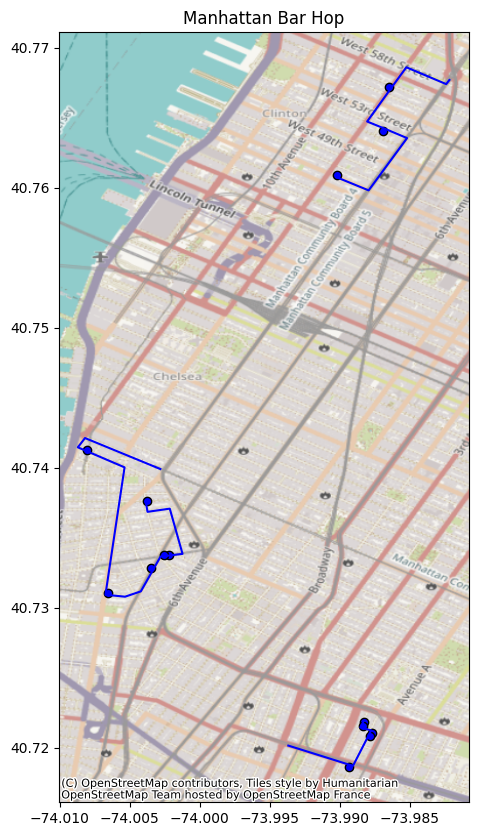

In [13]:
# visualize data i created
# Read the GeoJSON file
gdf = gpd.read_file('map.geojson')

# Create a plot with a basemap
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string())

# Add a title
plt.title('Manhattan Bar Hop')

# Show the plot
plt.show()

In [14]:
# Filter for points
points_gdf = gdf[gdf.geometry.type == 'Point']
points_gdf.head()

,geometry
0,POINT (-74.00653 40.73107)
1,POINT (-74.00375 40.73765)
2,POINT (-73.99021 40.76095)
3,POINT (-73.98693 40.76406)
4,POINT (-73.98823 40.72181)


In [15]:
df = pd.read_csv('MTA_Subway_Stations.csv')
df.head()


,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
0,637,408,619,IRT,Lexington Av,Bleecker St,M,True,6,Subway,40.725915,-73.994659,Uptown,Downtown,1,1,1,NaN,POINT (-73.994659 40.725915)
1,B23,70,70,BMT,West End,Bay 50 St,Bk,False,D,Elevated,40.588841,-73.983765,Manhattan,Coney Island,0,0,0,NaN,POINT (-73.983765 40.588841)
2,607,365,365,IRT,Pelham,Castle Hill Av,Bx,False,6,Elevated,40.834255,-73.851222,Pelham Bay,Manhattan,0,0,0,NaN,POINT (-73.851222 40.834255)
3,S01,139,627,BMT,Franklin Shuttle,Franklin Av,Bk,False,S,Elevated,40.680596,-73.955827,Last Stop,Prospect Park,1,1,1,NaN,POINT (-73.955827 40.680596)
4,M18,102,625,BMT,Jamaica,Delancey St-Essex St,M,True,J M Z,Subway,40.718315,-73.987437,Brooklyn,Inbound,0,0,0,NaN,POINT (-73.987437 40.718315)


In [16]:
from shapely import wkt

# Convert the 'Georeference' column to geometries
df['geometry'] = df['Georeference'].apply(wkt.loads)

# Filter for Borough Manhattan
df_filtered = df[df['Borough'] == 'M']

# Create a GeoDataFrame
gdf_station = gpd.GeoDataFrame(df_filtered, geometry='geometry', crs="EPSG:4326")

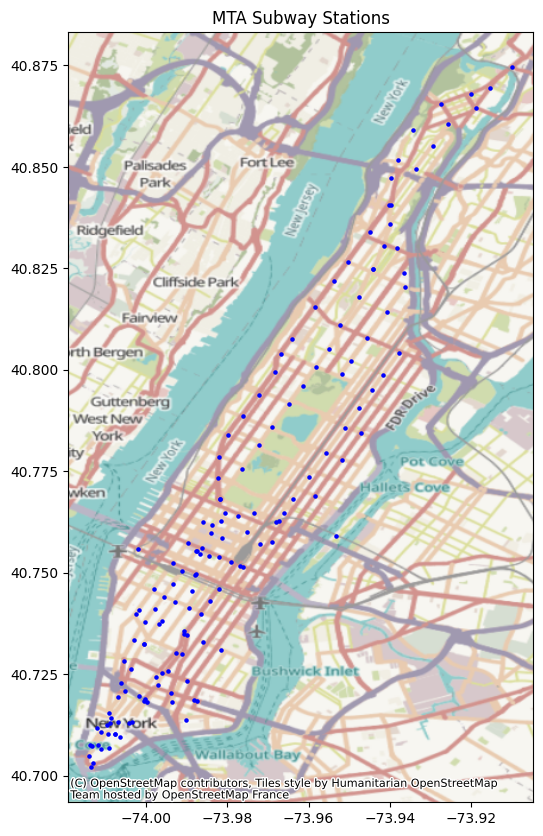

In [17]:
#visualize metro station in manhattan
# Plot the points with a basemap
fig, ax = plt.subplots(figsize=(10, 10))
gdf_station.plot(ax=ax, color='blue', markersize=5)

# Add basemap
ctx.add_basemap(ax, crs=gdf_station.crs.to_string())

# Add a title
plt.title('MTA Subway Stations')

# Show the plot
plt.show()

In [18]:
points_gdf.head()

,geometry
0,POINT (-74.00653 40.73107)
1,POINT (-74.00375 40.73765)
2,POINT (-73.99021 40.76095)
3,POINT (-73.98693 40.76406)
4,POINT (-73.98823 40.72181)


In [19]:
gdf_station.head()


,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference,geometry
0,637,408,619,IRT,Lexington Av,Bleecker St,M,True,6,Subway,40.725915,-73.994659,Uptown,Downtown,1,1,1,NaN,POINT (-73.994659 40.725915),POINT (-73.99466 40.72592)
4,M18,102,625,BMT,Jamaica,Delancey St-Essex St,M,True,J M Z,Subway,40.718315,-73.987437,Brooklyn,Inbound,0,0,0,NaN,POINT (-73.987437 40.718315),POINT (-73.98744 40.71831)
7,230,333,333,IRT,Clark St,Wall St,M,True,2 3,Subway,40.706821,-74.009100,Uptown,Brooklyn,0,0,0,NaN,POINT (-74.0091 40.706821),POINT (-74.00910 40.70682)
9,725,467,611,IRT,Flushing,Times Sq-42 St,M,True,7,Subway,40.755477,-73.987691,Queens,Hudson Yards,1,1,1,NaN,POINT (-73.987691 40.755477),POINT (-73.98769 40.75548)
10,F16,234,234,IND,6th Av - Culver,East Broadway,M,True,F,Subway,40.713715,-73.990173,Uptown,Brooklyn,0,0,0,NaN,POINT (-73.990173 40.713715),POINT (-73.99017 40.71372)


In [21]:
# Rename the 'geometry' column in gdf_station to 'geometryS'
gdf_station = gdf_station.rename(columns={'geometry': 'geometryS'})

# Set 'geometryS' as the active geometry column in gdf_station
gdf_station = gdf_station.set_geometry('geometryS')

# Ensure both GeoDataFrames have the same CRS
common_crs = "EPSG:4326"
points_gdf = points_gdf.to_crs(common_crs)
gdf_station = gdf_station.to_crs(common_crs)

gdf_station.head()


,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference,geometryS
0,637,408,619,IRT,Lexington Av,Bleecker St,M,True,6,Subway,40.725915,-73.994659,Uptown,Downtown,1,1,1,NaN,POINT (-73.994659 40.725915),POINT (-73.99466 40.72592)
4,M18,102,625,BMT,Jamaica,Delancey St-Essex St,M,True,J M Z,Subway,40.718315,-73.987437,Brooklyn,Inbound,0,0,0,NaN,POINT (-73.987437 40.718315),POINT (-73.98744 40.71831)
7,230,333,333,IRT,Clark St,Wall St,M,True,2 3,Subway,40.706821,-74.009100,Uptown,Brooklyn,0,0,0,NaN,POINT (-74.0091 40.706821),POINT (-74.00910 40.70682)
9,725,467,611,IRT,Flushing,Times Sq-42 St,M,True,7,Subway,40.755477,-73.987691,Queens,Hudson Yards,1,1,1,NaN,POINT (-73.987691 40.755477),POINT (-73.98769 40.75548)
10,F16,234,234,IND,6th Av - Culver,East Broadway,M,True,F,Subway,40.713715,-73.990173,Uptown,Brooklyn,0,0,0,NaN,POINT (-73.990173 40.713715),POINT (-73.99017 40.71372)


In [23]:

# Perform a spatial join to find the nearest station for each point
nearest_stations = gpd.sjoin_nearest(points_gdf, gdf_station, how="left", distance_col="distance_to_station")

# Inspect the columns of the nearest_stations DataFrame
print(nearest_stations.columns)

# Merge nearest_stations with gdf_station to get the geometry of the nearest station
# Assuming 'index_right' is the index of the nearest station in gdf_station
nearest_stations = nearest_stations.merge(
    gdf_station[['Stop Name', 'geometryS']], 
    left_on='index_right', 
    right_index=True,
    suffixes=('', '_station')
)

# Add columns for the nearest station ID, geometry, and distance
points_gdf['nearest_stop_name'] = nearest_stations['Stop Name_station']  # Adjust column name if needed
points_gdf['distance_to_nearest_station'] = nearest_stations['distance_to_station']
points_gdf['nearest_station_geometry'] = nearest_stations['geometryS']

points_gdf[['geometry', 'nearest_stop_name', 'distance_to_nearest_station', 'nearest_station_geometry']].head()

Index(['geometry', 'nearest_stop_name', 'distance_to_nearest_station',
       'nearest_station_geometry', 'index_right', 'GTFS Stop ID', 'Station ID',
       'Complex ID', 'Division', 'Line', 'Stop Name', 'Borough', 'CBD',
       'Daytime Routes', 'Structure', 'GTFS Latitude', 'GTFS Longitude',
       'North Direction Label', 'South Direction Label', 'ADA',
       'ADA Northbound', 'ADA Southbound', 'ADA Notes', 'Georeference',
       'distance_to_station'],
      dtype='object')


c:\Users\skyla\anaconda3\envs\python312\Lib\site-packages\geopandas\array.py:365: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


,geometry,nearest_stop_name,distance_to_nearest_station,nearest_station_geometry
0,POINT (-74.00653 40.73107),Houston St,0.003047,POINT (-74.00537 40.72825)
1,POINT (-74.00375 40.73765),8 Av,0.002431,POINT (-74.00258 40.73978)
2,POINT (-73.99021 40.76095),42 St-Port Authority Bus Terminal,0.003672,POINT (-73.98973 40.75731)
3,POINT (-73.98693 40.76406),50 St,0.001858,POINT (-73.98598 40.76246)
4,POINT (-73.98823 40.72181),2 Av,0.002331,POINT (-73.98994 40.72340)


i changed the station_id to stop name to make the outcomes more understandable.
Then i realize that in the context of GeoPandas and using the EPSG:4326 coordinate reference system (CRS), the distance unit for distance_to_station would be in degrees because EPSG:4326 represents geographic coordinates (latitude and longitude).
This makes the distance not easy to understand, so I need the distances in a more practical unit such as meters or kilometers. I reproject my geometries to a CRS that uses those units before performing the spatial join. A common choice for this is the EPSG:3857 (Pseudo-Mercator) 

In [26]:
# Define the projected CRS (e.g., EPSG:3857 for meters)
projected_crs = "EPSG:3857"

# Reproject the GeoDataFrames to the projected CRS
points_gdf = points_gdf.to_crs(projected_crs)
gdf_station = gdf_station.to_crs(projected_crs)

# Perform the spatial join
nearest_stations = gpd.sjoin_nearest(points_gdf, gdf_station, how="left", distance_col="distance_to_station")

# Merge nearest_stations with gdf_station to get the geometry of the nearest station
# Assuming 'index_right' is the index of the nearest station in gdf_station
nearest_stations = nearest_stations.merge(
    gdf_station[['Stop Name', 'geometryS']], 
    left_on='index_right', 
    right_index=True,
    suffixes=('', '_station')
)

# Add columns for the nearest station ID, geometry, and distance
points_gdf['nearest_stop_name'] = nearest_stations['Stop Name_station']  # Adjust column name if needed
points_gdf['distance_to_nearest_station'] = nearest_stations['distance_to_station']
points_gdf['nearest_station_geometry'] = nearest_stations['geometryS']

points_gdf[['geometry', 'nearest_stop_name', 'distance_to_nearest_station', 'nearest_station_geometry']].head()

,geometry,nearest_stop_name,distance_to_nearest_station,nearest_station_geometry
0,POINT (-8238369.104 4972754.775),Houston St,433.514907,POINT (-8238239.770 4972341.002)
1,POINT (-8238059.480 4973721.193),8 Av,339.063143,POINT (-8237929.300 4974034.270)
2,POINT (-8236553.041 4977145.290),50 St,520.494057,POINT (-8236082.065 4977366.865)
3,POINT (-8236187.254 4977602.069),50 St,257.654624,POINT (-8236082.065 4977366.865)
4,POINT (-8236332.342 4971395.473),2 Av,300.771873,POINT (-8236522.222 4971628.731)


Shows the nearest station on the map. The larger the size of the point, the closer the distance.

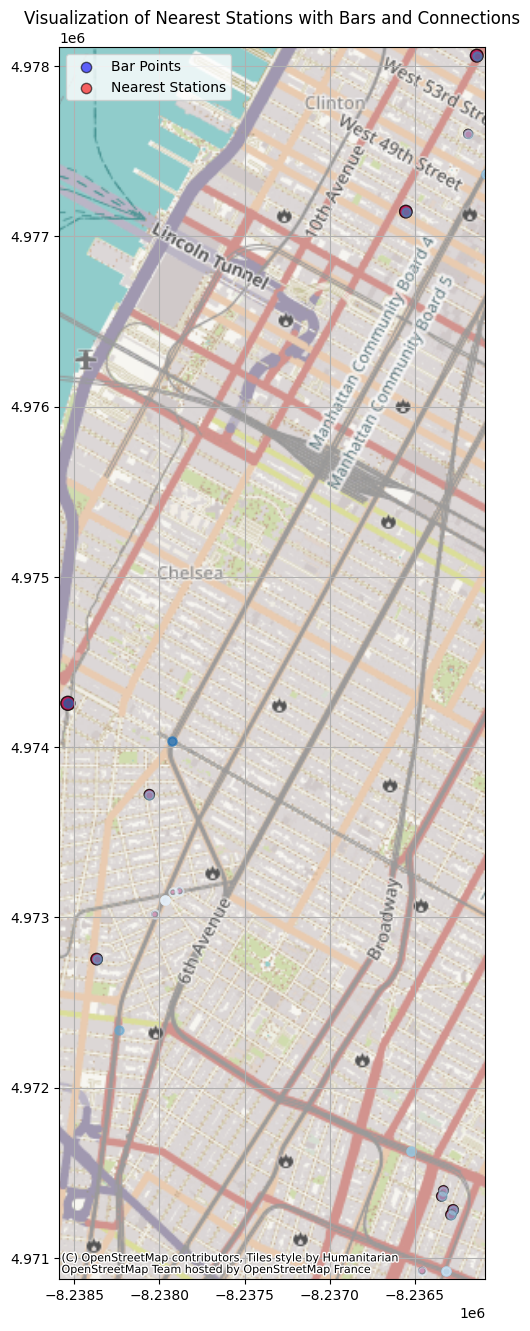

In [29]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(24, 16))

# Normalize the distance for visualization
distance_max = points_gdf['distance_to_nearest_station'].max()
size_scaling = 100  # Scaling factor for point sizes
color_scaling = 0.8  # Scaling factor for line color intensity

# Plot points_gdf with variable size based on distance
points_gdf.plot(ax=ax, color='blue', markersize=points_gdf['distance_to_nearest_station'] / distance_max * size_scaling, alpha=0.6, label='Bar Points', edgecolor='k')

# Plot nearest stations with variable size based on distance
try:
    nearest_stations.plot(ax=ax, color='red', markersize=nearest_stations['distance_to_station'] / distance_max * size_scaling, alpha=0.6, label='Nearest Stations', edgecolor='k')
except KeyError as e:
    print(f"KeyError encountered: {e}")
    # Debug by printing column names
    print("Columns available in nearest_stations:", nearest_stations.columns)

# Draw lines connecting each point to its nearest station
for idx, row in points_gdf.iterrows():
    try:
        # Access nearest station geometry from nearest_stations
        nearest_geom = nearest_stations.loc[nearest_stations['Stop Name'] == row['nearest_stop_name'], 'geometryS'].values[0]
        
        # Create a line connecting the point to its nearest station
        line = gpd.GeoSeries([row['geometry'], nearest_geom])
        
        # Calculate line color intensity based on distance
        distance = row['distance_to_nearest_station']
        line_color = plt.cm.Blues(distance / distance_max * color_scaling)  # Line color intensity based on distance

        # Plot the line
        line.plot(ax=ax, color=line_color, linewidth=1.5, alpha=0.6)
    except IndexError as e:
        print(f"IndexError encountered: {e}")
        print(f"Row info: {row}")
        # Debug by printing nearest_geom and nearest_station
        print("Nearest geometry for this row:", nearest_stations.loc[nearest_stations['Stop Name'] == row['nearest_stop_name']])

# Set plot title and legend
ax.set_title('Visualization of Nearest Stations with Bars and Connections')
ax.legend()
ax.grid(True)

# Set extent to match data with padding
bounds = points_gdf.total_bounds  # (xmin, ymin, xmax, ymax)
padding = 50  # Padding factor for extending the bounds
ax.set_xlim(bounds[0] - padding, bounds[2] + padding)
ax.set_ylim(bounds[1] - padding, bounds[3] + padding)

# Plot base map
ctx.add_basemap(ax, crs=points_gdf.crs.to_string())

plt.show()

In [30]:
# Find the rows with the smallest values in 'distance_to_station'
smallest_distances = nearest_stations.nsmallest(4, 'distance_to_station')

# Print the rows with the smallest values
smallest_distances[['Stop Name', 'distance_to_station', 'geometry', 'geometryS']]

,Stop Name,distance_to_station,geometry,geometryS
12,Christopher St-Stonewall,64.461433,POINT (-8237922.197 4973148.095),POINT (-8237965.813 4973100.630)
10,Christopher St-Stonewall,99.739515,POINT (-8237882.381 4973155.283),POINT (-8237965.813 4973100.630)
11,Christopher St-Stonewall,103.756179,POINT (-8238028.274 4973017.781),POINT (-8237965.813 4973100.630)
8,Delancey St-Essex St,138.759442,POINT (-8236457.935 4970925.174),POINT (-8236319.175 4970925.030)


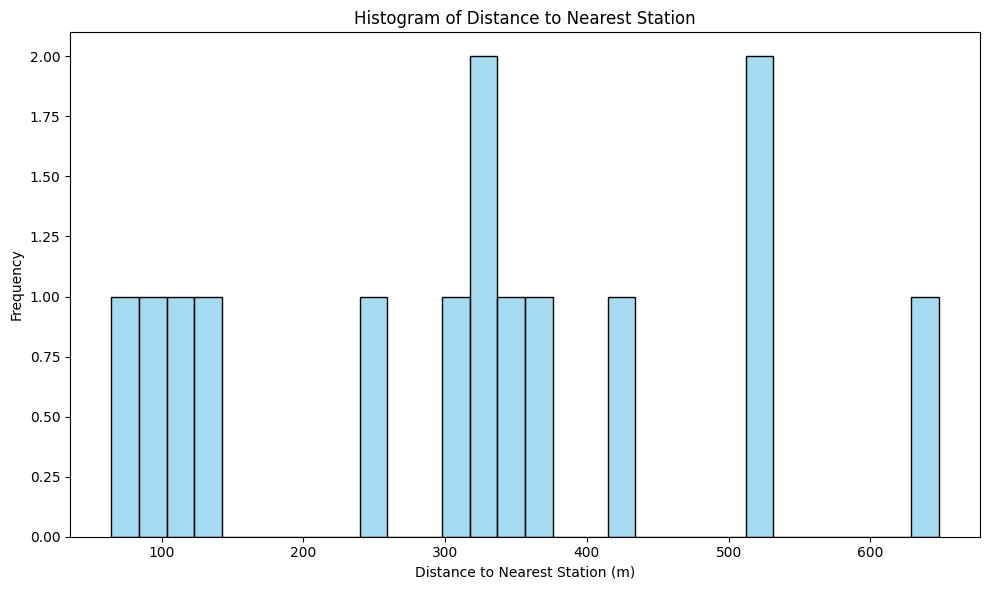

In [32]:
import seaborn as sns

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram
sns.histplot(nearest_stations['distance_to_station'], bins=30, ax=ax, color='skyblue')
ax.set_title('Histogram of Distance to Nearest Station')
ax.set_xlabel('Distance to Nearest Station (m)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [34]:
# Count occurrences of each Station ID
station_id_counts = nearest_stations['Stop Name'].value_counts()

# Print count data

print(station_id_counts)


Stop Name
Delancey St-Essex St        3
Christopher St-Stonewall    3
8 Av                        2
50 St                       2
2 Av                        2
Houston St                  1
59 St-Columbus Circle       1
Name: count, dtype: int64


So next time i go for bar hopping, i may better choose station like Delancey St-Essex St and Christopher St-Stonewall.
Then i visualize the overall data by the following chart.

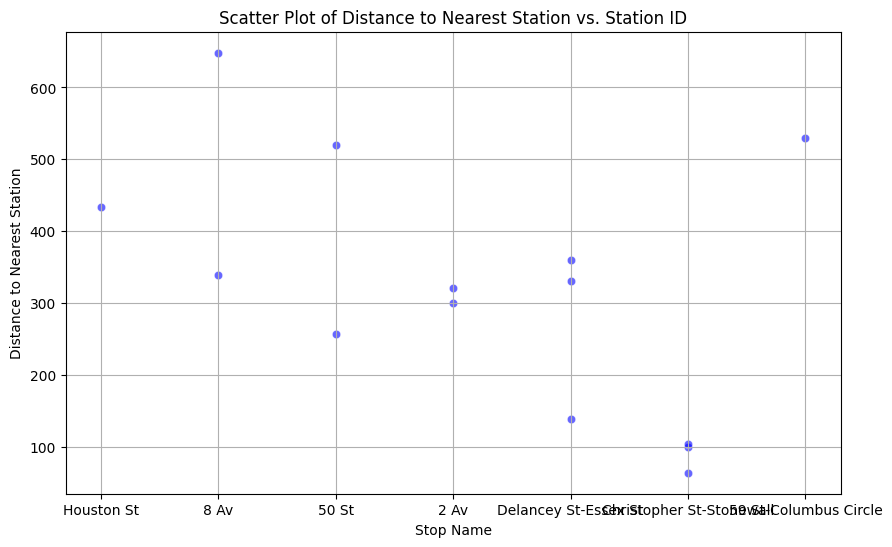

In [35]:
# Create scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stop Name', y='distance_to_station', data=nearest_stations, color='blue', alpha=0.6)
plt.title('Scatter Plot of Distance to Nearest Station vs. Station ID')
plt.xlabel('Stop Name')
plt.ylabel('Distance to Nearest Station')
plt.grid(True)
plt.show()